In [40]:
import pathlib
path=str(pathlib.Path().resolve().parent)+"/imagenes/"

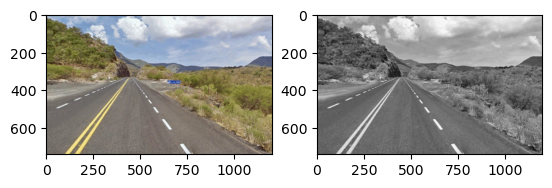

In [41]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread(path+"carretera.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
fig,ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(gray,cmap="gray")

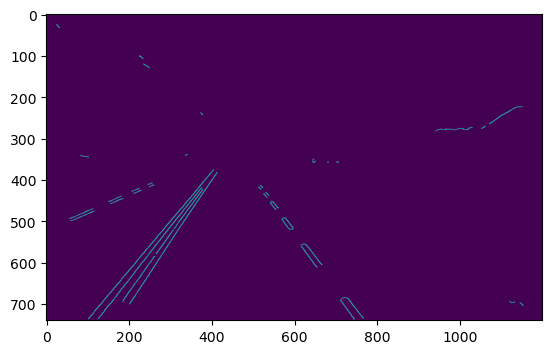

In [44]:
import numpy as np


img_blur = cv.GaussianBlur(gray,(7,7),sigmaX=5,sigmaY=5)
edges = cv.Canny(img_blur,150,200)

plt.imshow(edges)

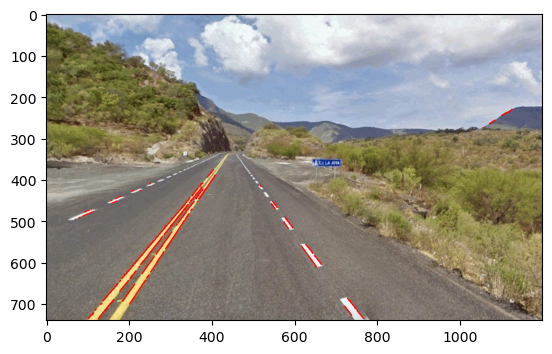

In [51]:


# VOTOS
min_votos = 40

# PARA QUE UNA LÍNEA SEA VALIDA TIENE QUE TENER 200 PÍXELES
min_len = 100

# PÍXELES ENTRE LÍNEAS PARA CONTAR COMO OTRA LÍNEA (SEPARACIÓN)
max_gap = 1

lineas = cv.HoughLinesP(edges,1,np.pi/180,min_votos,min_len,max_gap)

cop = img.copy()
for linea in lineas:
    x1,y1,x2,y2 = linea[0]
    cv.line(cop,(x1,y1),(x2,y2),(255,0,0),2)

plt.imshow(cop)